In [1]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.plot import plot_average_all_steps, plot_average_last_step

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# OFAT SA
One Factor at A Time (OFAT or OFaaT) SA is a method of testing the output variance of inputs one at a time. 

In [12]:
data = pd.read_csv('../results/ofat_results_vary_agents.csv')

In [3]:
data['sentence_length'] = data['sentence_length'].astype(int)
data['total_wealth'] = data['total_wealth'].astype(float)
data['gini_coeff'] = data['gini_coeff'].astype(float)

### Sentence Length
Analyze how varying sentence length would affect the model outputs

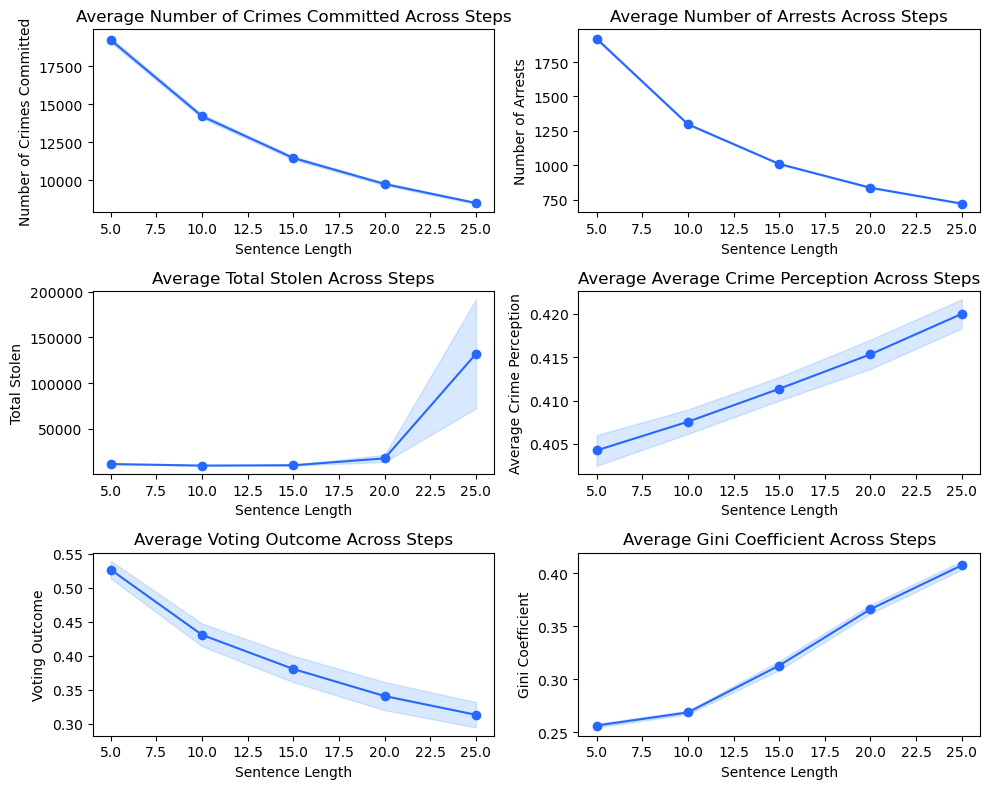

In [4]:
plot_average_all_steps(data, 'sentence_length', 'Sentence Length')

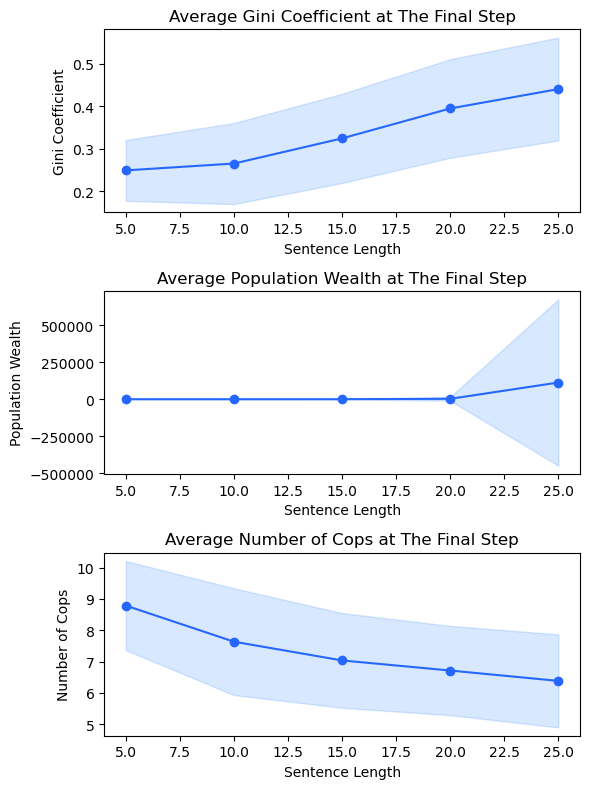

In [5]:
plot_average_last_step(data, 'sentence_length', 'Sentence Length')

### Standard deviation in the distribution of risk aversion
to analyze how homogeneity and diversity in agents' risk profiles would affect the dynamics

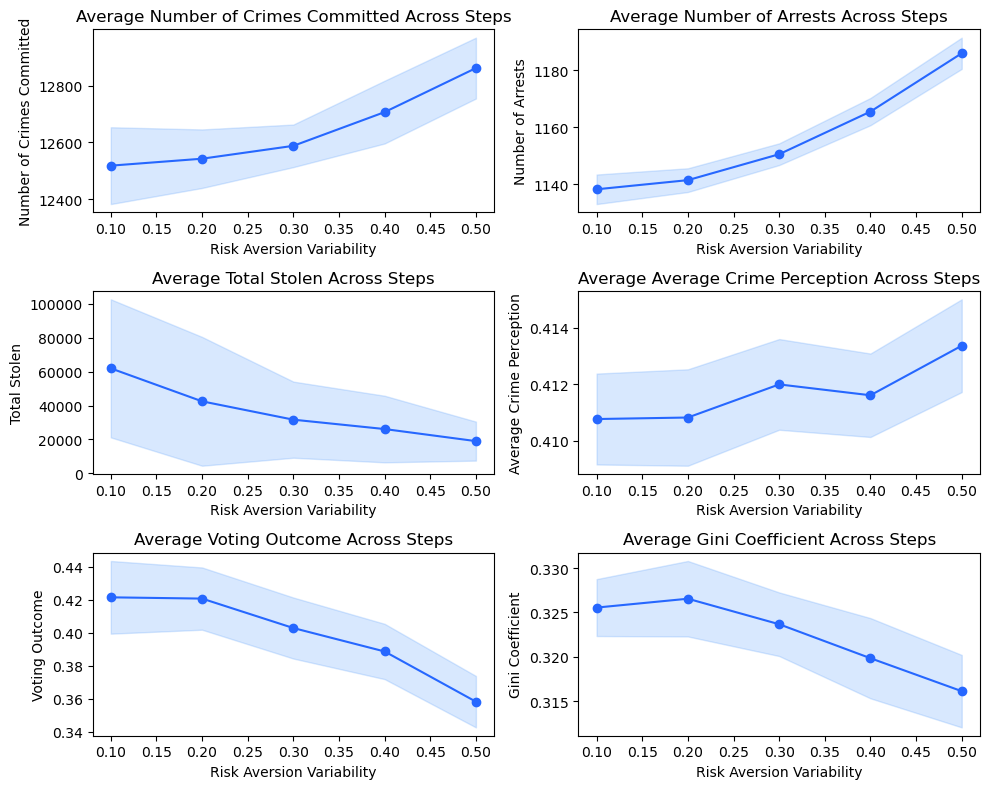

In [9]:
plot_average_all_steps(data, 'risk_aversion_std', 'Risk Aversion Variability')

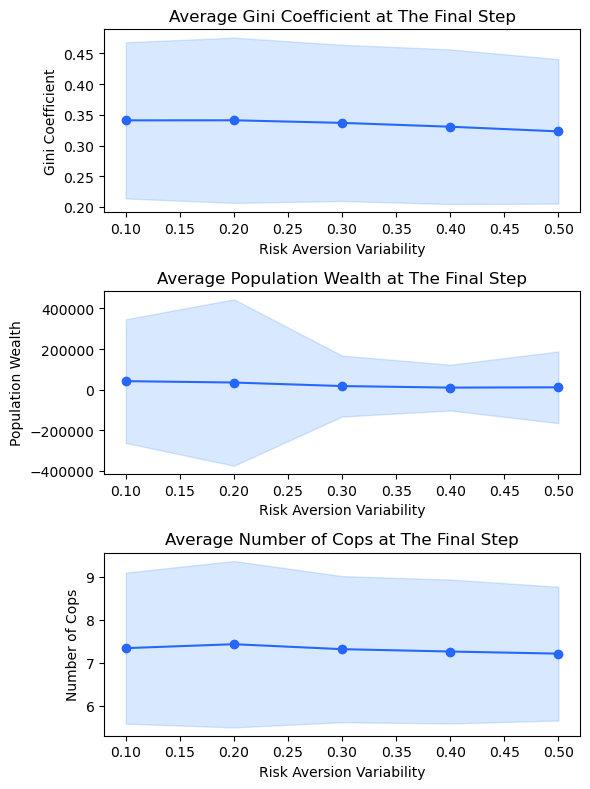

In [8]:
plot_average_last_step(data, 'risk_aversion_std', 'Risk Aversion Variability')

### Interaction Memory

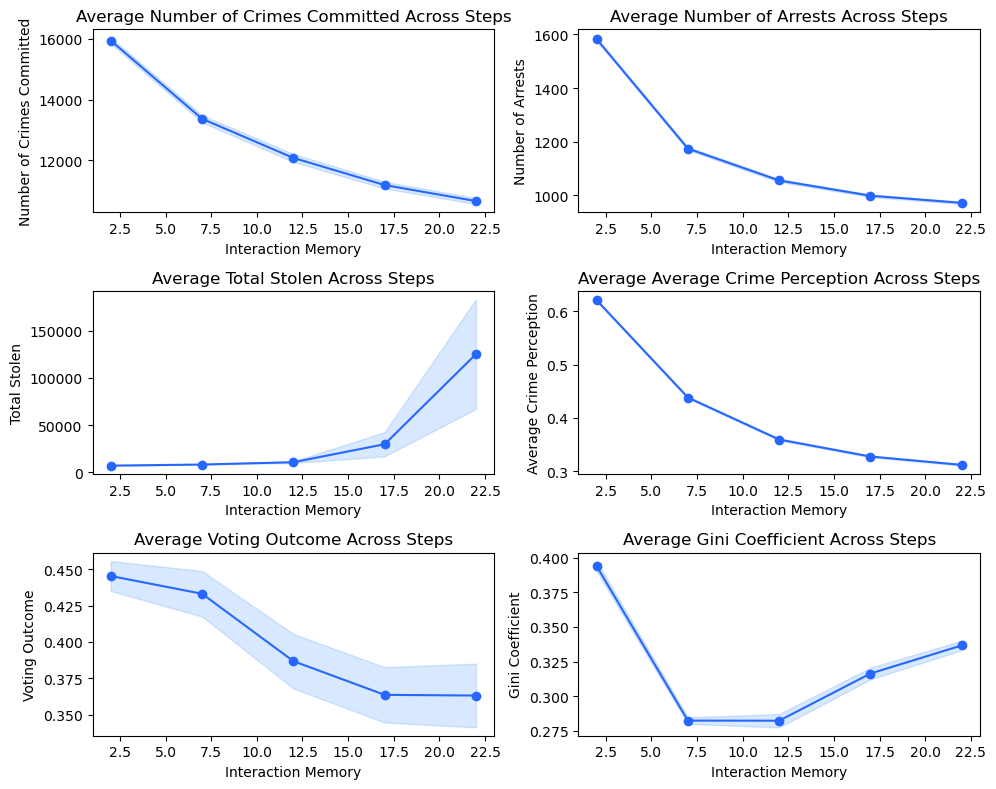

In [10]:
plot_average_all_steps(data, 'interaction_memory', 'Interaction Memory')

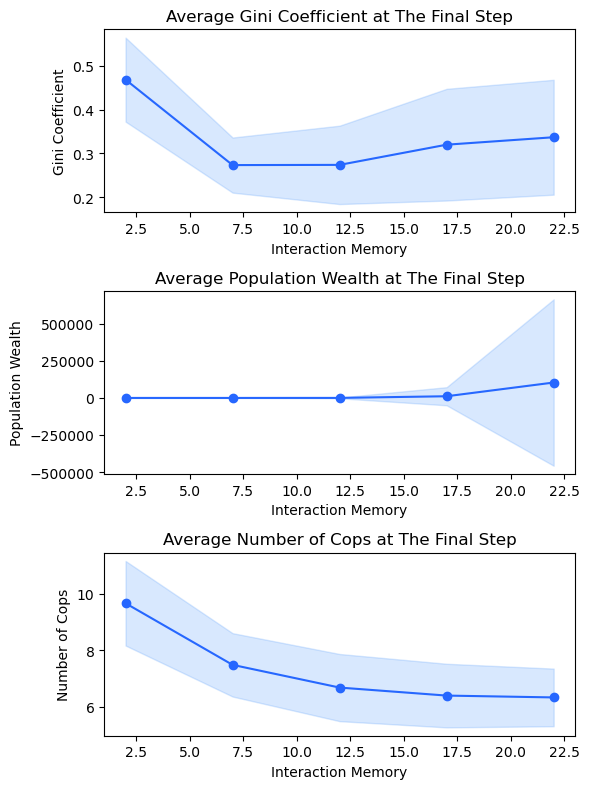

In [11]:
plot_average_last_step(data, 'interaction_memory', 'Interaction Memory')

## Agents

In [13]:
data.describe()

,Step,num_cops,num_crimes_committed,num_arrests_made,tax_rate,total_stolen,total_trade_income,avg_wealth,total_wealth,avg_crime_perception,vote_outcome,gini_coeff,iteration,sentence_length,interaction_memory,risk_aversion_std
count,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3000000.0,3000000.0,3.000000e+06
mean,5.005000e+02,7.278217e+00,7.881705e+03,8.566356e+02,7.507020e-02,3.372362e+07,2.918294e+07,1.728454e+04,3.258240e+06,3.997719e-01,-4.851033e-01,4.359487e-01,1.450000e+01,20.0,50.0,3.000000e-01
std,2.886750e+02,3.482583e+00,1.009472e+04,7.632481e+02,3.608819e-02,8.354601e+08,7.244851e+08,4.321106e+05,8.613195e+07,1.295151e-01,1.145544e+01,1.352820e-01,8.655443e+00,0.0,0.0,1.831868e-15
min,1.000000e+00,0.000000e+00,3.600000e+01,0.000000e+00,0.000000e+00,8.861472e+01,0.000000e+00,9.163989e-23,6.414792e-21,0.000000e+00,-2.000000e+02,1.164229e-01,0.000000e+00,20.0,50.0,3.000000e-01
25%,2.507500e+02,5.000000e+00,1.284000e+03,2.590000e+02,5.000000e-02,1.139974e+03,1.083999e+03,1.878949e+00,2.016029e+02,3.173469e-01,0.000000e+00,3.655624e-01,7.000000e+00,20.0,50.0,3.000000e-01
50%,5.005000e+02,6.000000e+00,4.300000e+03,6.240000e+02,6.000000e-02,3.704118e+04,2.302523e+04,1.699825e+01,2.042220e+03,3.741593e-01,0.000000e+00,4.490268e-01,1.450000e+01,20.0,50.0,3.000000e-01
75%,7.502500e+02,8.000000e+00,1.048600e+04,1.255000e+03,9.000000e-02,6.150199e+05,5.727376e+05,3.667606e+02,5.210679e+04,4.882644e-01,0.000000e+00,5.105080e-01,2.200000e+01,20.0,50.0,3.000000e-01
max,1.000000e+03,2.000000e+01,6.851000e+04,3.808000e+03,2.000000e-01,2.278975e+11,1.930077e+11,1.162447e+08,2.324894e+10,7.665586e-01,2.000000e+02,9.940898e-01,2.900000e+01,20.0,50.0,3.000000e-01
